## Bonus: Business-Oriented Questions

12. Which types of products generate **the best customer satisfaction** (high ratings and high discounts)?
13. Are there specific **categories** where discounts have **no effect** on customer satisfaction?
14. Is there a **correlation** between **discount percentage** and **rating**?
    → (*Correlation analysis or regression*)
15. Do **higher discounts** lead to **higher customer ratings**?
    → (*Hypothesis testing: H₀ = no relationship*)

---

## what we are going to answer in that section

12. Which types of products generate **the best customer satisfaction** (high ratings and high discounts)?

In [73]:
import ast 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import seaborn as sns
import statsmodels.api as sm

# Set the path to the file you'd like to load
file_path = 'M:/3_datasets/amazon_data.csv'

# Load the latest version
df = pd.read_csv(file_path)

# clean 
df['actual_price'] = (df['actual_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False))
df['discounted_price'] = (df['discounted_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False))
df['discount_percentage'] = (df['discount_percentage'].str.replace('%', '', regex=False).str.replace(',', '', regex=False))
df['rating_count'] = (df['rating_count'].str.replace(',', '', regex=False))
df['rating'] = (df['rating'].str.replace('|', '0', regex=False))


df['actual_price']= df['actual_price'].astype(float)
df['discounted_price']= df['discounted_price'].astype(float)
df['discount_percentage']= df['discount_percentage'].astype(float)
df['rating_count']= df['rating_count'].astype(float)
df['rating']= df['rating'].astype(float)

# turn discount_percentage to float percentage
df['discount_percentage']= df['discount_percentage'].apply(lambda x: x/100)

# make the discounted_price more accurate
df['discounted_price'] = (df['actual_price'] * (1 - df['discount_percentage']))

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [75]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,395.64,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,198.93,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,189.90,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,328.53,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,155.61,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [76]:
df['category_clean']= df['category'].apply(lambda x: x.split('|')[-2]).copy()

In [77]:
# persentage analysis

discount_percentages= df['discount_percentage'].to_list()

percentages= []

for percentage in discount_percentages:
    if percentage >= 0.70:
        percentages.append('high')

    elif 0.70 > percentage >= 0.5:
        percentages.append('mid')
    
    else:
        percentages.append('low')


In [78]:
# Ratings analysis

Ratings= df['rating'].to_list()

ratings= []

for Rating in Ratings:
    if Rating >= 4:
        ratings.append('high')
    
    elif 4 > Rating >= 3.5:
        ratings.append('mid')
    
    else:
        ratings.append('low')


In [79]:
df_percentages = pd.DataFrame(percentages, columns=['percentages_rate'])

df_ratings = pd.DataFrame(ratings, columns=['ratings_rate'])



### note: 

pd.concat([df_percentages, df_ratings], axis=1)
means:

“Combine these two DataFrames side by side so each percentage aligns with its rating on the same row.”

In [80]:
df_concat= pd.concat([df_percentages, df_ratings], axis=1)
df_concat


,percentages_rate,ratings_rate
0,mid,high
1,low,high
2,high,mid
3,mid,high
4,mid,high
...,...,...
1460,mid,high
1461,low,high
1462,low,mid
1463,low,high


In [81]:
def get_insight(discount, rating):
    if discount == 'high' and rating == 'high':
        return " Very satisfying and price-effective"
    elif discount == 'high' and rating == 'mid':
        return "Discount attracts customers but satisfaction is average"
    elif discount == 'high' and rating == 'low':
        return "Discount doesn’t improve satisfaction"
    elif discount == 'mid' and rating == 'high':
        return "Good perceived value; balanced performance"
    elif discount == 'mid' and rating == 'mid':
        return "Average offer — moderate satisfaction and price"
    elif discount == 'mid' and rating == 'low':
        return "Product quality may be weak despite fair pricing"
    elif discount == 'low' and rating == 'high':
        return "People like it regardless of price; strong intrinsic value"
    elif discount == 'low' and rating == 'mid':
        return "Reasonably liked even without discounts"
    else:  # low & low
        return "Weak in both — neither price nor satisfaction attracts buyers"

# Apply it to every row
df_concat['insight'] = df_concat.apply(lambda row: get_insight(row['percentages_rate'], row['ratings_rate']), axis=1)


In [82]:
df_full = pd.concat([df, df_concat], axis=1)
df_full

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category_clean,percentages_rate,ratings_rate,insight
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,395.64,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Cables,mid,high,Good perceived value; balanced performance
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,198.93,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Cables,low,high,People like it regardless of price; strong int...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,189.90,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Cables,high,mid,Discount attracts customers but satisfaction i...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,328.53,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Cables,mid,high,Good perceived value; balanced performance
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,155.61,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Cables,mid,high,Good perceived value; balanced performance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,376.79,919.0,0.59,4.0,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,WaterPurifiers&Accessories,mid,high,Goo

In [83]:
df_insight= df_full[['category_clean','percentages_rate','ratings_rate','insight']]
df_insight_sorted= df_insight.sort_values(by='category_clean').reset_index().drop(columns='index')
df_insight_sorted

,category_clean,percentages_rate,ratings_rate,insight
0,Accessories,mid,mid,Average offer — moderate satisfaction and price
1,Accessories,mid,low,Product quality may be weak despite fair pricing
2,Accessories,low,low,Weak in both — neither price nor satisfaction ...
3,Accessories,mid,mid,Average offer — moderate satisfaction and price
4,Accessories,low,mid,Reasonably liked even without discounts
...,...,...,...,...
1460,WearableTechnology,high,high,Very satisfying and price-effective
1461,WearableTechnology,low,high,People like it regardless of price; strong int...
1462,Webcams&VoIPEquipment,low,high,People like it regardless of price; strong int...
1463,Webcams&VoIPEquipment,mid,high,Good perceived value; balanced performance


In [84]:
df_insight_sorted_high= df_insight_sorted[(df_insight_sorted['percentages_rate'] == 'high') & (df_insight_sorted['ratings_rate'] == 'high')].copy()
df_index_h= df_insight_sorted_high.reset_index()
df_index_h= df_index_h.drop(columns='index')
df_index_h= df_index_h.reset_index()
df_index_h= df_index_h.set_index('index')
df_index_h

,category_clean,percentages_rate,ratings_rate,insight
index,,,,
0,Accessories,high,high,Very satisfying and price-effective
1,Accessories,high,high,Very satisfying and price-effective
2,Accessories,high,high,Very satisfying and price-effective
3,Accessories,high,high,Very satisfying and price-effective
4,Adapters,high,high,Very satisfying and price-effective
...,...,...,...,...
158,WearableTechnology,high,high,Very satisfying and price-effective
159,WearableTechnology,high,high,Very satisfying and price-effective
160,WearableTechnology,high,high,Very satisfying and price-effective


In [85]:
count_h= df_index_h.value_counts('category_clean').head(6)
count_h_df= count_h.reset_index()
count_h_df

,category_clean,count
0,Cables,48
1,WearableTechnology,34
2,MobileAccessories,11
3,LaptopAccessories,6
4,TabletAccessories,5
5,MemoryCards,5


In [86]:
df_insight_sorted_mid= df_insight_sorted[(df_insight_sorted['percentages_rate'] == 'mid') & (df_insight_sorted['ratings_rate'] == 'mid')].copy()
df_index_m= df_insight_sorted_mid.reset_index()
df_index_m= df_index_m.drop(columns='index')
df_index_m= df_index_m.reset_index()
df_index_m= df_index_m.set_index('index')
df_index_m

,category_clean,percentages_rate,ratings_rate,insight
index,,,,
0,Accessories,mid,mid,Average offer — moderate satisfaction and price
1,Accessories,mid,mid,Average offer — moderate satisfaction and price
2,Accessories,mid,mid,Average offer — moderate satisfaction and price
3,Accessories,mid,mid,Average offer — moderate satisfaction and price
4,Accessories,mid,mid,Average offer — moderate satisfaction and price
...,...,...,...,...
100,WaterPurifiers&Accessories,mid,mid,Average offer — moderate satisfaction and price
101,WaterPurifiers&Accessories,mid,mid,Average offer — moderate satisfaction and price
102,WearableTechnology,mid,mid,Average offer — moderate satisfaction and price


In [87]:
count_m= df_index_m.value_counts('category_clean').head(6)
count_m_df= count_m.reset_index()
count_m_df

,category_clean,count
0,Accessories,17
1,Headphones,15
2,SmallKitchenAppliances,10
3,Cables,9
4,RoomHeaters,7
5,WaterHeaters&Geysers,6


In [88]:
df_insight_sorted_mid= df_insight_sorted[(df_insight_sorted['percentages_rate'] == 'low') & (df_insight_sorted['ratings_rate'] == 'low')].copy()
df_index_l= df_insight_sorted_mid.reset_index()
df_index_l= df_index_l.drop(columns='index')
df_index_l= df_index_l.reset_index()
df_index_l= df_index_l.set_index('index')
df_index_l

,category_clean,percentages_rate,ratings_rate,insight
index,,,,
0,Accessories,low,low,Weak in both — neither price nor satisfaction ...
1,Accessories,low,low,Weak in both — neither price nor satisfaction ...
2,Headphones,low,low,Weak in both — neither price nor satisfaction ...
3,NetworkAdapters,low,low,Weak in both — neither price nor satisfaction ...
4,Printers,low,low,Weak in both — neither price nor satisfaction ...
5,RoomHeaters,low,low,Weak in both — neither price nor satisfaction ...
6,RoomHeaters,low,low,Weak in both — neither price nor satisfaction ...
7,RoomHeaters,low,low,Weak in both — neither price nor satisfaction ...
8,RoomHeaters,low,low,Weak in both — neither price nor satisfaction ...


In [89]:
count_l= df_index_l.value_counts('category_clean').head()
count_l_df= count_l.reset_index()
count_l_df

,category_clean,count
0,RoomHeaters,5
1,Accessories,2
2,Headphones,1
3,NetworkAdapters,1
4,Printers,1


In [90]:
df_insight_sorted_mid= df_insight_sorted[((df_insight_sorted['percentages_rate'] == 'high') & (df_insight_sorted['ratings_rate'] == 'mid')) | ((df_insight_sorted['percentages_rate'] == 'mid') & (df_insight_sorted['ratings_rate'] == 'high')) ].copy()
df_index_hm= df_insight_sorted_mid.reset_index()
df_index_hm= df_index_hm.drop(columns='index')
df_index_hm= df_index_hm.reset_index()
df_index_hm= df_index_hm.set_index('index')
df_index_hm

,category_clean,percentages_rate,ratings_rate,insight
index,,,,
0,Accessories,mid,high,Good perceived value; balanced performance
1,Accessories,mid,high,Good perceived value; balanced performance
2,Accessories,mid,high,Good perceived value; balanced performance
3,Accessories,mid,high,Good perceived value; balanced performance
4,Accessories,high,mid,Discount attracts customers but satisfaction i...
...,...,...,...,...
447,WearableTechnology,high,mid,Discount attracts customers but satisfaction i...
448,WearableTechnology,mid,high,Good perceived value; balanced performance
449,WearableTechnology,mid,high,Good perceived value; balanced performance


In [91]:
count_hm= df_index_hm.value_counts('category_clean').head()
count_hm_df= count_hm.reset_index()
count_hm_df

,category_clean,count
0,Cables,151
1,Headphones,32
2,WearableTechnology,30
3,SmallKitchenAppliances,29
4,Accessories,17


In [92]:
df_insight_sorted_mid= df_insight_sorted[((df_insight_sorted['percentages_rate'] == 'low') & (df_insight_sorted['ratings_rate'] == 'mid')) | ((df_insight_sorted['percentages_rate'] == 'mid') & (df_insight_sorted['ratings_rate'] == 'low')) ].copy()
df_index_lm= df_insight_sorted_mid.reset_index()
df_index_lm= df_index_lm.drop(columns='index')
df_index_lm= df_index_lm.reset_index()
df_index_lm= df_index_lm.set_index('index')
df_index_lm

,category_clean,percentages_rate,ratings_rate,insight
index,,,,
0,Accessories,mid,low,Product quality may be weak despite fair pricing
1,Accessories,low,mid,Reasonably liked even without discounts
2,Accessories,low,mid,Reasonably liked even without discounts
3,Accessories,low,mid,Reasonably liked even without discounts
4,Accessories,low,mid,Reasonably liked even without discounts
...,...,...,...,...
149,WaterPurifiers&Accessories,low,mid,Reasonably liked even without discounts
150,WaterPurifiers&Accessories,low,mid,Reasonably liked even without discounts
151,WaterPurifiers&Accessories,low,mid,Reasonably liked even without discounts


In [93]:
count_lm= df_index_lm.value_counts('category_clean').head()
count_lm_df= count_lm.reset_index()
count_lm_df

,category_clean,count
0,SmallKitchenAppliances,25
1,RoomHeaters,14
2,Kettles&HotWaterDispensers,13
3,Smartphones&BasicMobiles,12
4,Accessories,10


In [94]:
df_insight_sorted_mid= df_insight_sorted[((df_insight_sorted['percentages_rate'] == 'high') & (df_insight_sorted['ratings_rate'] == 'low')) | ((df_insight_sorted['percentages_rate'] == 'low') & (df_insight_sorted['ratings_rate'] == 'high')) ].copy()
df_index_lh= df_insight_sorted_mid.reset_index()
df_index_lh= df_index_lh.drop(columns='index')
df_index_lh= df_index_lh.reset_index()
df_index_lh= df_index_lh.set_index('index')
df_index_lh

,category_clean,percentages_rate,ratings_rate,insight
index,,,,
0,Accessories,low,high,People like it regardless of price; strong int...
1,Accessories,low,high,People like it regardless of price; strong int...
2,Accessories&Peripherals,low,high,People like it regardless of price; strong int...
3,Accessories&Peripherals,low,high,People like it regardless of price; strong int...
4,Accessories&Peripherals,low,high,People like it regardless of price; strong int...
...,...,...,...,...
574,WearableTechnology,high,low,Discount doesn’t improve satisfaction
575,WearableTechnology,high,low,Discount doesn’t improve satisfaction
576,WearableTechnology,high,low,Discount doesn’t improve satisfaction


In [95]:
count_lh= df_index_lh.value_counts('category_clean').head()
count_lh_df= count_lh.reset_index()
count_lh_df

,category_clean,count
0,SmallKitchenAppliances,69
1,Smartphones&BasicMobiles,65
2,Televisions,54
3,Cables,51
4,Irons,25


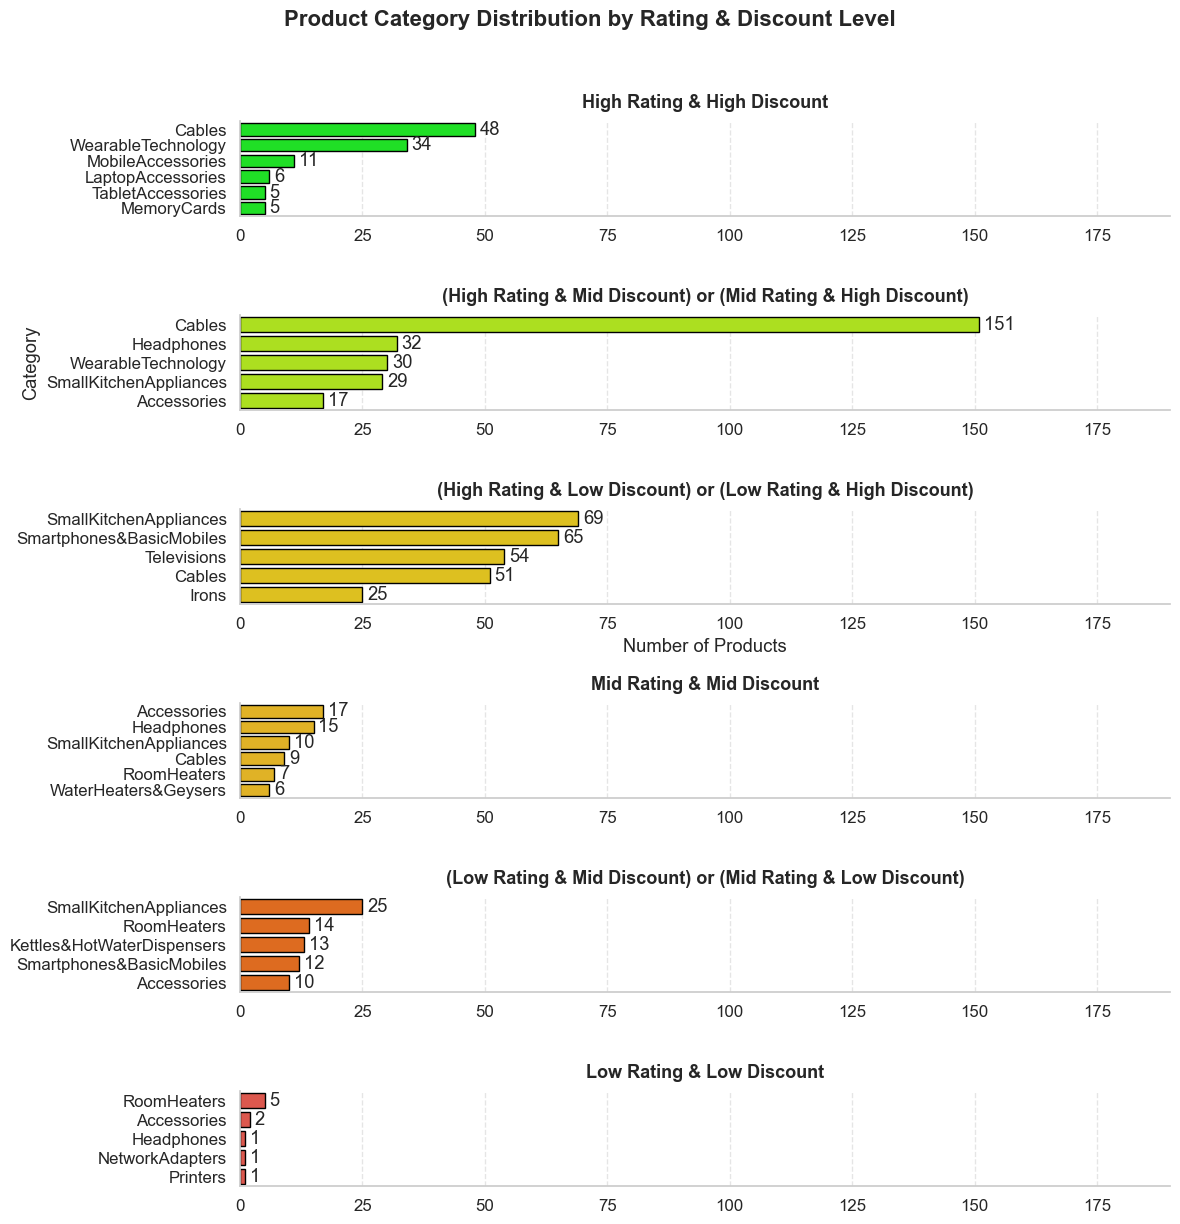

In [101]:
sns.set_theme(style="whitegrid", font_scale=1.1)

# --- Create subplots ---
fig, ax = plt.subplots(6, 1, figsize=(12, 12))

# --- Define color palette and data groups ---
plot_data = [
    (count_h_df, "High Rating & High Discount", "#00FF08"),
    (count_hm_df, "(High Rating & Mid Discount) or (Mid Rating & High Discount)", "#BBFF00"),
    (count_lh_df, "(High Rating & Low Discount) or (Low Rating & High Discount)", "#FCD600"),
    (count_m_df, "Mid Rating & Mid Discount", "#FFC107"),
    (count_lm_df, "(Low Rating & Mid Discount) or (Mid Rating & Low Discount)", "#FC6500"),
    (count_l_df, "Low Rating & Low Discount", "#F44336")
]

# --- Loop through each subplot ---
for i, (data, title, color) in enumerate(plot_data):
    sns.barplot(
        data=data,
        y='category_clean',
        x='count',
        color=color,
        ax=ax[i],
        edgecolor='black'
    )
    ax[i].set_xlim(0, 190)
    ax[i].set_title(title, fontsize=13, fontweight='bold', pad=10)
    ax[i].set_ylabel('Category' if i == 1 else '')  # keep center one only
    ax[i].set_xlabel('Number of Products' if i == 2 else '')
    ax[i].grid(axis='x', linestyle='--', alpha=0.5)

    for index, row in data.iterrows():
        ax[i].text(
            row['count'] + 1,     # x position (slightly to the right of bar)
            index,                # y position (row index)
            str(row['count']),    # text to display
            va='center'           # vertical alignment
        )

# --- Overall figure title ---
fig.suptitle("Product Category Distribution by Rating & Discount Level", 
             fontsize=16, fontweight='bold', y=1.02)

sns.despine()
plt.tight_layout()
plt.show()